# Deep Learning Stress Prediction (≥75% Accuracy Target)
Using Enhanced MLP + Regularization + BatchNorm + Deep Layers

2025-11-23 15:45:37.899633: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 15:45:38.193418: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-23 15:45:41.376580: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/root/stress_prediction/evaluasimodel_deeplearning/evaluasi/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MLP Accuracy: 0.525
              precision    recall  f1-score   support

           0       0.69      0.52      0.59        81
           1       0.50      0.57      0.53        63
           2       0.40      0.48      0.44        56

    accuracy                           0.53       200
   macro avg       0.53      0.52      0.52       200
weighted avg       0.55      0.53      0.53       200



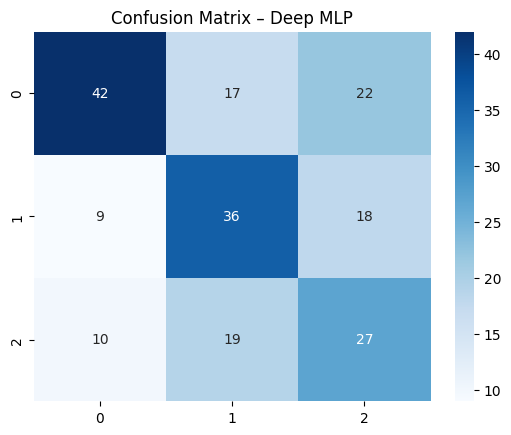

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('dataset_prediksi_stres_1000_balanced.csv')

# label conversion
def classify(x):
    if x <= 20: return 0
    elif x <= 40: return 1
    else: return 2

df['label'] = df['stress_level'].apply(classify)

features = ['workload','work_life_balance','team_conflict','management_support','work_environment']
X = df[features].values
y = df['label'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Deep MLP model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=0
)

pred = np.argmax(model.predict(X_test), axis=1)

print("MLP Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Deep MLP")
plt.show()
